In [1]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict


from sklearn import set_config
set_config(transform_output="pandas")

warnings.filterwarnings("ignore")

In [14]:
pd.set_option('display.max_columns', None)

In [16]:
pd.set_option('display.max_colwidth', None)

Pulling data from SQL database with custom function:

In [3]:
## TO PULL TABLES just pull one fo the names
#     aws_raw_data_table = 'Science1900_2023'
#     aws_vectorized_data_table = 'topified_vectorized_Science1900_2023'
#     aws_topic_proba_data_table = 'topic_proba_data_Science1900_2023'
#     model_name = 'model_Science1900_2023'

#### EVERYONE WE ARE WORKING WITH ; 
# aws_vectorized_data_table ========= whose table name is;  
# 
# 'topified_vectorized_Science1900_2023'

## PULL Functions from custom functions
from custom_functions import bertopic_addons as cfc  

In [4]:

## you will need to change the name below
currenttable = 'Nature_1869_2023'
aws_dfs = cfc.pull_aws_sql_database(currenttable)
## please save the table as a csv on your computer!!!
# otherwise weird things may happen on AWS which we have to pay for

Step 1/7: Loading the dataset ...


In [5]:
aws_dfs  

,paperId,externalIds,publicationVenue,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,s2FieldsOfStudy,publicationTypes,publicationDate,title_abstract
0,555e719ce01a68fdf5b4bb26fd0f71493e8dd8ea,"{'ArXiv': '1405.7034', 'MAG': '2021450548', 'D...",None,Chiral anomaly and optical absorption in Weyl ...,Weyl semimetals are a three-dimensional topolo...,2014,0,102,1,['Physics'],"[{'category': 'Physics', 'source': 'external'}...",None,2014-05-27,Chiral anomaly optical absorption Weyl semimet...
1,d87b42cf5e1be41e6560b0ada1defa746e500404,"{'MAG': '2013643906', 'DOI': '10.1029/JZ072I01...",None,Electron impact cross sections for atmospheric...,Using a modification of the Born Approximation...,1967,26,95,1,['Geology'],"[{'category': 'Geology', 'source': 'external'}...",None,1967-08-01,Electron impact cross sections atmospheric spe...
2,1d39a207cad9560b23b25d915222a4c0a84cdb34,"{'MAG': '1967084626', 'DOI': '10.1088/0950-767...",None,An apparatus for the investigation of pre-brea...,A description is given of an apparatus designe...,1966,6,11,0,['Chemistry'],"[{'category': 'Chemistry', 'source': 'external...",None,1966-07-01,apparatus investigation pre-breakdown ionizati...
3,e964faa1bb8f3de7e301dd43108c5a4d2f7c7b53,"{'MAG': '1968851590', 'DOI': '10.1086/288171',...","{'id': 'c113624f-9929-40bf-803c-0396e35e3e14',...",A Simultaneous Axiomatization of Utility and S...,This paper contributes to the mathematical fou...,1967,9,114,6,['Mathematics'],"[{'category': 'Mathematics', 'source': 'extern...",None,1967-12-01,Simultaneous Axiomatization Utility Subjective...
4,7393a13e1f1ac673734feb07aab07c4756f7075d,"{'MAG': '2007075426', 'DOI': '10.1136/bmj.1.51...","{'id': '3048b449-a773-4256-9bb5-5e61fbb61e52',...",Food-poisoning and Food Hygiene,"Glycyrrhetinic Acid Ointment SIR,-I have read ...",1959,0,107,6,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],1959-05-30,Food-poisoning Food Hygiene Glycyrrhetinic Aci...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65900,24ae4312b8110ba787e1b07752ae0e2603d9865f,"{'PubMedCentral': '4014759', 'MAG': '295329476...","{'id': '74dbb751-54d9-4be5-baa6-52a5e58ea8dd',...",Environmental Burden of Disease in Europe: Ass...,Background: Environmental health effects vary ...,2014,56,328,17,['Medicine'],"[{'category': 'Medicine', 'source': 'external'...","['JournalArticle', 'Review']",2014-02-28,Environmental Burden Disease Europe: Assessing...
65901,b1729ac5a3796026905e5fae60d1bbe7b8b4f3dc,"{'MAG': '1559614440', 'DOI': '10.4049/jimmunol...","{'id': '3456d2d7-a9b4-495f-a7a0-a238096ee07a',...",Comparative immunogenicity of hepatitis B viru...,The nucleocapsid (hepatitis B core Ag (HBcAg] ...,1988,0,116,4,"['Medicine', 'Biology']","[{'category': 'Medicine', 'source': 'external'...","['JournalArticle', 'Study']",1988-11-15,Comparative immunogenicity hepatitis B virus c...
65902,02dd6aa0c587f864ed2f57dfc5eeb4c72298d2b0,"{'MAG': '2060355588', 'DOI': '10.1177/03091325...",None,Urban geography I,In the midst of what has been termed the ‘urba...,2015,70,476,8,['Geography'],"[{'category': 'Geography', 'source': 'external...",['JournalArticle'],2015-10-01,"Urban geography midst termed ‘urban age’, dive..."
65903,3104d2c54b9c43f16aad4d0cd5d61032a051870c,"{'MAG': '2073250481', 'DOI': '10.1073/PNAS.52....","{'id': 'bb95bf2e-8383-4748-bf9d-d6906d091085',...",ORIENTED MICROTUBULES IN ELONGATING CELLS OF T...,"7Harrington, H. J., Bull. Am. Assoc. Petrol. G...",1964,2,213,4,"['Medicine', 'Biology']","[{'category': 'Medicine', 'source': 'external'...",['JournalArticle'],1964-10-01,ORIENTED MICROTUBULES ELONGATING CELLS DEVELOP...


In [163]:
import datetime
aws_dfs['publicationDate'] = pd.to_datetime(aws_dfs['publicationDate'])

In [164]:
# Filter the DataFrame for rows starting from 2005
df_2005_raw = aws_dfs[aws_dfs['publicationDate'].dt.year >= 2005]

In [166]:
df_2005_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10771 entries, 0 to 65902
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   paperId                   10771 non-null  object        
 1   externalIds               10771 non-null  object        
 2   publicationVenue          6915 non-null   object        
 3   title                     10771 non-null  object        
 4   abstract                  10771 non-null  object        
 5   year                      10771 non-null  int64         
 6   referenceCount            10771 non-null  int64         
 7   citationCount             10771 non-null  int64         
 8   influentialCitationCount  10771 non-null  int64         
 9   fieldsOfStudy             10460 non-null  object        
 10  s2FieldsOfStudy           10771 non-null  object        
 11  publicationTypes          8552 non-null   object        
 12  publicationDate        

In [165]:
df_2005_raw.to_csv('df_nature_2005_2023_Semantic_Scholar_raw.csv', index=False)  

In [6]:
aws_dfs.to_csv('df_nature_1869_2023_Semantic_Scholar.csv', index=False)  

In [7]:
## you will need to change the name below
currenttable = 'topified_vectorized_Nature_1869_2023' 
aws_dfs_1 = cfc.pull_aws_sql_database(currenttable)
## please save the table as a csv on your computer!!!
# otherwise weird things may happen on AWS which we have to pay for

Step 1/7: Loading the dataset ...


In [20]:
aws_dfs_1.head(5)

paperId  \
0  64527b67785e565327441dbede71be242f227f4b   
1  d0a5d789aa4d44ec49eab0384cd5484898861968   
2  0d563b20f3c5c8ac3ca4dba6de83e177a4c9ab60   
3  cf1e6afc3d93f26e56ffdb3049ca312a99091eb3   
4  4ace086792de75c85f83d7b5a2c2483f2ac0e1bd   

                                                                        externalIds  \
0                          {'DOI': '10.1136/bmj.1.1731.469', 'CorpusId': 220004740}   
1   {'MAG': '2094112481', 'DOI': '10.1680/GEOT.1949.1.3.159', 'CorpusId': 98582119}   
2  {'MAG': '2170433190', 'DOI': '10.1177/1536867X0700700301', 'CorpusId': 15778832}   
3      {'DOI': '10.1136/bmj.1.587.340', 'CorpusId': 34903095, 'PubMed': '20748519'}   
4                      {'DOI': '10.4135/9781412963862.n124', 'CorpusId': 239137206}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            publicationVenue  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       None   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       None   
2                                                                                                                                                                                                                                                                                                             

In [9]:
aws_dfs_1.to_csv('topified_vectorized_Nature_1869_2023_Semantic_Scholar.csv', index=False) 

In [10]:
## you will need to change the name below
currenttable = 'topic_proba_data_Nature_1869_2023' 
aws_dfs_2 = cfc.pull_aws_sql_database(currenttable)
## please save the table as a csv on your computer!!!
# otherwise weird things may happen on AWS which we have to pay for

Step 1/7: Loading the dataset ...


In [11]:
aws_dfs_2

,topic_code,topic,probability
0,-1,patients,0.003961
1,-1,cells,0.003603
2,-1,study,0.003599
3,-1,results,0.003433
4,-1,cases,0.003196
...,...,...,...
1435,142,ra,0.024788
1436,142,amer,0.017422
1437,142,joints,0.015743
1438,142,ann,0.015005


In [12]:
aws_dfs_2.to_csv('topic_proba_data_Nature_1869_2023_Semantic_Scholar.csv', index=False) 

In [21]:
aws_dfs_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65905 entries, 0 to 65904
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   paperId                   65905 non-null  object 
 1   externalIds               65905 non-null  object 
 2   publicationVenue          35040 non-null  object 
 3   title                     65905 non-null  object 
 4   abstract                  65905 non-null  object 
 5   year                      65905 non-null  int64  
 6   referenceCount            65905 non-null  int64  
 7   citationCount             65905 non-null  int64  
 8   influentialCitationCount  65905 non-null  int64  
 9   fieldsOfStudy             62767 non-null  object 
 10  s2FieldsOfStudy           65905 non-null  object 
 11  publicationTypes          38388 non-null  object 
 12  publicationDate           57370 non-null  object 
 13  title_abstract            65905 non-null  object 
 14  topic_

In [22]:
import datetime
aws_dfs_1['publicationDate'] = pd.to_datetime(aws_dfs_1['publicationDate'])

In [23]:
aws_dfs_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65905 entries, 0 to 65904
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   paperId                   65905 non-null  object        
 1   externalIds               65905 non-null  object        
 2   publicationVenue          35040 non-null  object        
 3   title                     65905 non-null  object        
 4   abstract                  65905 non-null  object        
 5   year                      65905 non-null  int64         
 6   referenceCount            65905 non-null  int64         
 7   citationCount             65905 non-null  int64         
 8   influentialCitationCount  65905 non-null  int64         
 9   fieldsOfStudy             62767 non-null  object        
 10  s2FieldsOfStudy           65905 non-null  object        
 11  publicationTypes          38388 non-null  object        
 12  publicationDate   

In [97]:
df = aws_dfs_1[['title', 'abstract','publicationDate','citationCount','influentialCitationCount','topic_code','topic_list','x_vector','y_vector','z_vector']]

In [25]:
df

title  \
0                                                                                                             Reviews   
1                                                                                            Electro-Osmosis in Soils   
2                                        Robust Standard Errors for Panel Regressions with Cross-Sectional Dependence   
3                                                                                               Therapeutic Memoranda   
4                                                                                                   Disordered Eating   
...                                                                                                               ...   
65900                                              Histiocytic tumors (fibrous xanthoma and histiocytoma) in children   
65901  Renormalization-group methods for critical dynamics: I. Recursion relations and effects of energy conservation   
65902                                        Hepatic drug targeting: phase I evaluation of polymer-bound doxorubicin.   
65903                                    First results from KamLAND: evidence for reactor antineutrino disappearance.   
65904                           A General Method for Investigating the Equilibrium of Gene Frequency in a Population.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Removing topic_code -1 (Outliers)

In [98]:
df = df[df['topic_code'] != -1]

In [99]:
df.duplicated().value_counts()

False    38556
Name: count, dtype: int64

In [100]:
df.isna().sum()

title                          0
abstract                       0
publicationDate             4940
citationCount                  0
influentialCitationCount       0
topic_code                     0
topic_list                     0
x_vector                       0
y_vector                       0
z_vector                       0
dtype: int64

In [29]:
import missingno as msno

<Axes: >

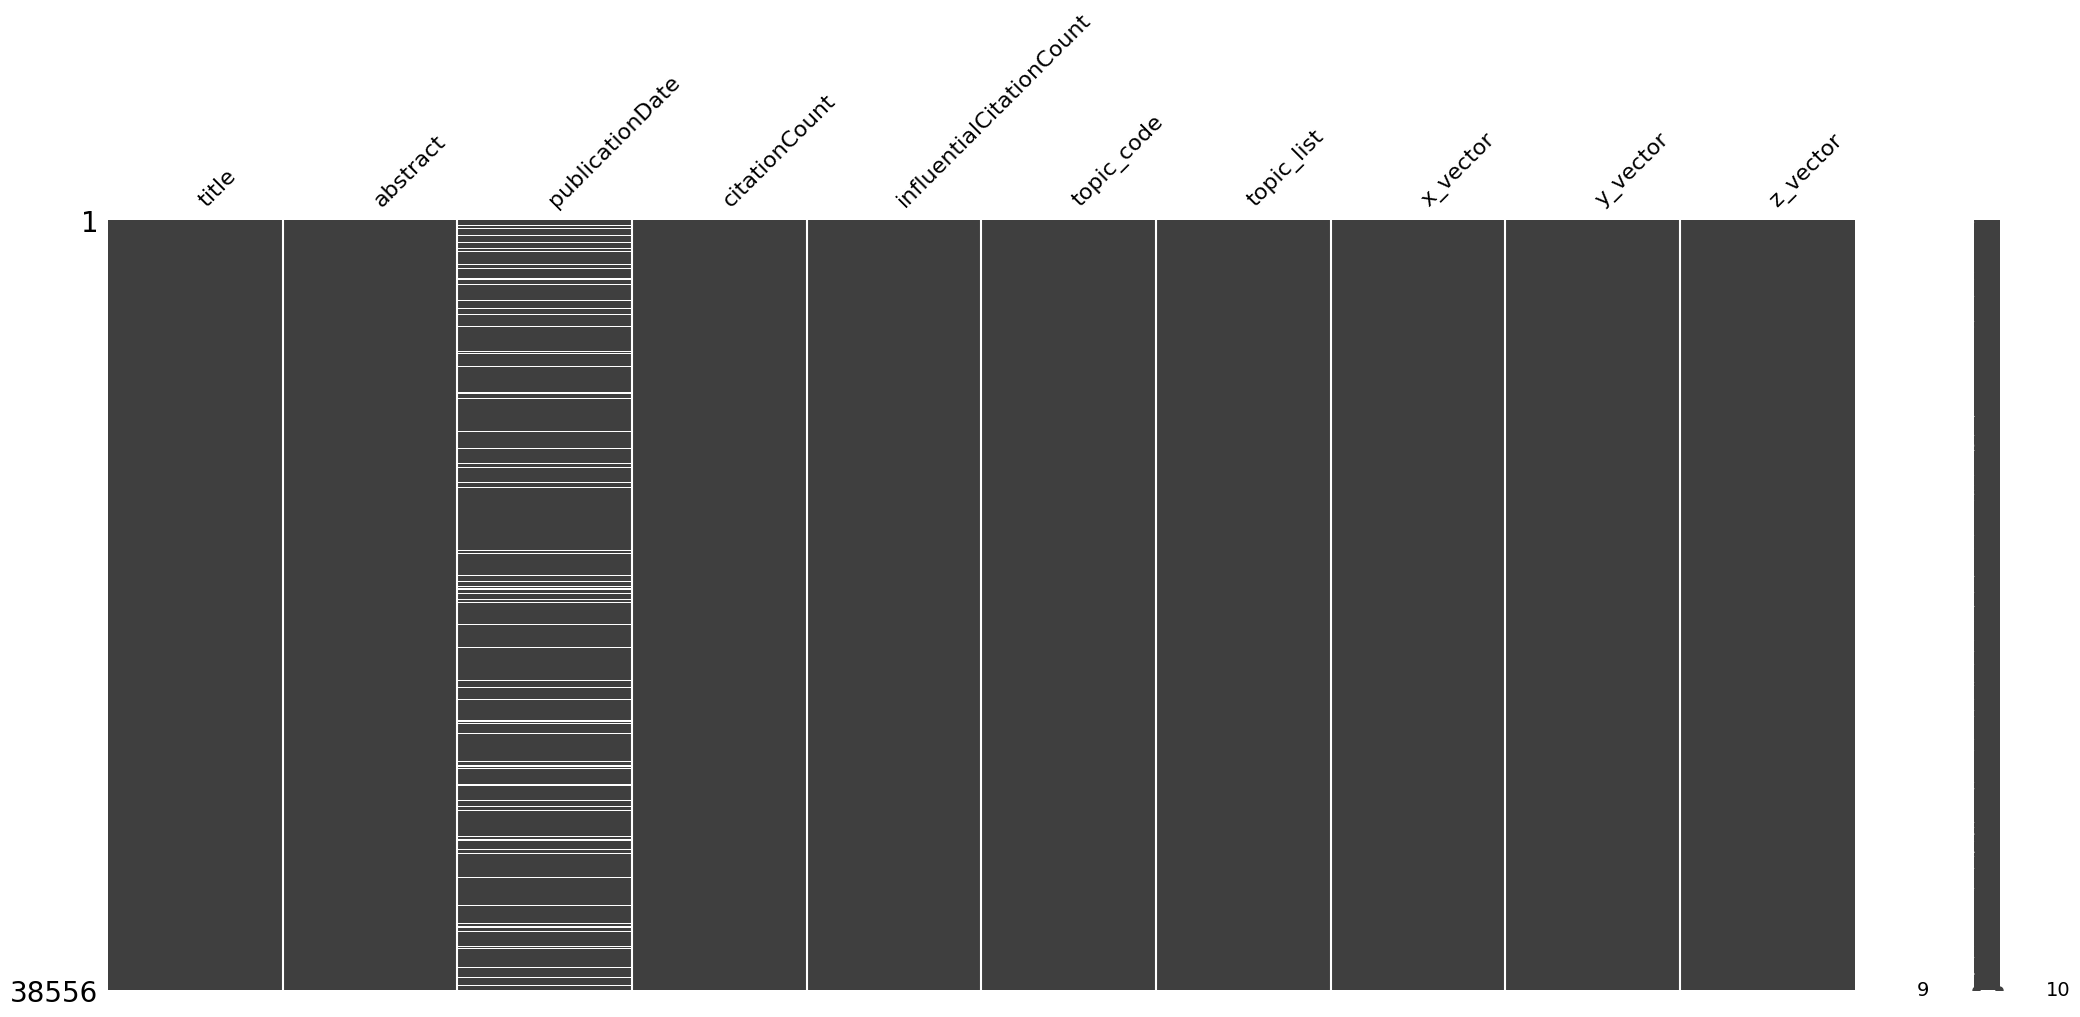

In [101]:
msno.matrix(df) 

In [102]:
df= df.dropna()

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33616 entries, 0 to 65904
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     33616 non-null  object        
 1   abstract                  33616 non-null  object        
 2   publicationDate           33616 non-null  datetime64[ns]
 3   citationCount             33616 non-null  int64         
 4   influentialCitationCount  33616 non-null  int64         
 5   topic_code                33616 non-null  int64         
 6   topic_list                33616 non-null  object        
 7   x_vector                  33616 non-null  float64       
 8   y_vector                  33616 non-null  float64       
 9   z_vector                  33616 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 2.8+ MB


In [104]:
df['topic_code'].nunique()

143

In [105]:
df.head(2)

title  \
0                Reviews   
3  Therapeutic Memoranda   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [106]:
df_groupby_topics = df.groupby('topic_code')

In [107]:
df_groupby_topics

In [108]:
df_grouped_topics = df_groupby_topics['citationCount'].sum().reset_index()

In [109]:
df_grouped_topics

,topic_code,citationCount
0,0,705622
1,1,387671
2,2,137531
3,3,141998
4,4,152771
...,...,...
138,138,332
139,139,10102
140,140,10191
141,141,18582


In [110]:
df_grouped_topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   topic_code     143 non-null    int64
 1   citationCount  143 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


In [ ]:
df_grouped_topics

In [111]:
df_grouped_topics = df_grouped_topics.sort_values(by='citationCount', ascending=False)

In [123]:
df_grouped_topics.head(11)

,topic_code,citationCount
5,5,792858
0,0,705622
8,8,524788
26,26,513656
1,1,387671
19,19,323729
9,9,320254
16,16,294356
22,22,287370
7,7,262058


In [128]:
df_grouped_topics = df_grouped_topics.rename(columns={'citationCount': 'Topic_citationCount'})

In [129]:
df_grouped_topics.head(20)

,topic_code,Topic_citationCount
5,5,792858
0,0,705622
8,8,524788
26,26,513656
1,1,387671
19,19,323729
9,9,320254
16,16,294356
22,22,287370
7,7,262058


In [130]:
df_merge = pd.merge(df, df_grouped_topics, on='topic_code')

In [131]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33616 entries, 0 to 33615
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     33616 non-null  object        
 1   abstract                  33616 non-null  object        
 2   publicationDate           33616 non-null  datetime64[ns]
 3   citationCount             33616 non-null  int64         
 4   influentialCitationCount  33616 non-null  int64         
 5   topic_code                33616 non-null  int64         
 6   topic_list                33616 non-null  object        
 7   x_vector                  33616 non-null  float64       
 8   y_vector                  33616 non-null  float64       
 9   z_vector                  33616 non-null  float64       
 10  Topic_citationCount       33616 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 2.8+ MB


In [132]:
df_sorted_topic_citations = df_merge.sort_values(by='Topic_citationCount', ascending=False)

In [ ]:
df_sorted_topic_citations

In [133]:
df_sorted_topic_citations.head(11)

title  \
24186               Persistent Effects of Job Displacement: The Importance of Multiple Job Losses   
23896                                The Division of Labor is Limited by the Extent of the Market   
23906                                                  Export Versus FDI with Heterogeneous Firms   
23905                                             Environmental Externalities and Cost of Capital   
23904                                                            The General Theory of Employment   
23903                                 Saving and Uncertainty: The Precautionary Demand for Saving   
23902                                          Search theory and duration data: a theory of sorts   
23901  Program Patterns and Preferences, and the Workability of Competition in Radio Broadcasting   
23900                                        An Examination of Corporate Tax Shelter Participants   
23899                                                     WHY FIRMS VOLUNTARILY DISCLOSE BAD-NEWS   
23898                                         Trade Generation, Reputation and Sell-Side Analysts   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [134]:
df_1 = df_sorted_topic_citations.copy()

In [118]:
df_grouped_topics.head(10)

,topic_code,citationCount
5,5,792858
0,0,705622
8,8,524788
26,26,513656
1,1,387671
19,19,323729
9,9,320254
16,16,294356
22,22,287370
7,7,262058


In [116]:
df_top_10 = df_1[df_1['topic_code'] == [5,0,8,26,1,19,9,16,22,7]]

ValueError: ('Lengths must match to compare', (56238,), (10,))

In [135]:
# Define the list of topic codes you want to filter
topic_codes_to_filter = [5, 0, 8, 26, 1, 19, 9, 16, 22, 7]

# Filter the DataFrame based on the list of topic codes
df_top_10 = df_1[df_1['topic_code'].isin(topic_codes_to_filter)]

In [136]:
df_top_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8227 entries, 24186 to 15309
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     8227 non-null   object        
 1   abstract                  8227 non-null   object        
 2   publicationDate           8227 non-null   datetime64[ns]
 3   citationCount             8227 non-null   int64         
 4   influentialCitationCount  8227 non-null   int64         
 5   topic_code                8227 non-null   int64         
 6   topic_list                8227 non-null   object        
 7   x_vector                  8227 non-null   float64       
 8   y_vector                  8227 non-null   float64       
 9   z_vector                  8227 non-null   float64       
 10  Topic_citationCount       8227 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 771.3+ KB


In [137]:
df_top_10['topic_list'].nunique()

10

In [138]:
df_top_10['topic_list'].unique()

array(['5_economic_market_income_capital',
       '0_coli_escherichia_strains_isolates',
       '8_energy_electron_molecules_calculations',
       '26_statistics_distribution_statistical_variance',
       '1_theorem_let_space_functions', '19_stars_star_survey_mass',
       '9_flow_velocity_waves_turbulence',
       '16_adsorption_oxygen_electrode_electrochemical',
       '22_quantum_theory_field_mechanics',
       '7_cortex_motor_memory_temporal'], dtype=object)

In [113]:
df_grouped_topics.head(10)

,topic_code,citationCount
5,5,792858
0,0,705622
8,8,524788
26,26,513656
1,1,387671
19,19,323729
9,9,320254
16,16,294356
22,22,287370
7,7,262058


In [139]:
df_top_10

title  \
24186               Persistent Effects of Job Displacement: The Importance of Multiple Job Losses   
23896                                The Division of Labor is Limited by the Extent of the Market   
23906                                                  Export Versus FDI with Heterogeneous Firms   
23905                                             Environmental Externalities and Cost of Capital   
23904                                                            The General Theory of Employment   
...                                                                                           ...   
15313                                             Thalamo‐cortical connections of the rat's brain   
15315                Cross-Domain Semantic Priming in Normal Subjects and a Prosopagnosic Patient   
15311                           STATUS EPILEPTICUS: A CLINICAL AND PATHOLOGICAL STUDY IN EPILEPSY   
15310  Functional organization of the trigeminal motor system in man. A neurophysiological study.   
15309                                                         STUDIES IN STUTTERING: INTRODUCTION   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

## This was for all publications since 1869, now for data since 2005

In [142]:
df.head(1)

,title,abstract,publicationDate,citationCount,influentialCitationCount,topic_code,topic_list,x_vector,y_vector,z_vector
0,Reviews,"Cyel I. l .. ltt tt, tlt;'dII(Ates of i ta;c(4rtcti,>ital ticket-. l)D. 1tI' p \ vct 1}'-i -t1-1;-i 1;""l l""l (l-rs, trcated jj~ Fjt\ rt2tt iittt at thj-)iid<Ipiii a 2t1I, t-cIttl 1 FVeilStiti \II()iiighaui III, I( I AC lIirI. dcciaI, II-I . at Il I) IF 1tl.\1\AlEER 1!coNl tE,1 1reICZ1ti' 11 iii I l c t a i. -). * 'IF wld le a t l tlt ivh c ]it'c' I 1t( it retaIIIe It tliti id W)(;1s s, ( 1 ,t1 1, llilt -,IV,'1 s l sI (ll)x I;'11t",1894-03-03,0,0,104,104_lb_ill_till_1111,4.179571,3.73707,8.19078


In [143]:
# Filter the DataFrame for rows starting from 2005
df_2005 = df[df['publicationDate'].dt.year >= 2005]

In [145]:
df_2005.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7101 entries, 16 to 65883
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     7101 non-null   object        
 1   abstract                  7101 non-null   object        
 2   publicationDate           7101 non-null   datetime64[ns]
 3   citationCount             7101 non-null   int64         
 4   influentialCitationCount  7101 non-null   int64         
 5   topic_code                7101 non-null   int64         
 6   topic_list                7101 non-null   object        
 7   x_vector                  7101 non-null   float64       
 8   y_vector                  7101 non-null   float64       
 9   z_vector                  7101 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 610.2+ KB


In [146]:
df_2005_groupby_topics = df_2005.groupby('topic_code')

In [147]:
df_2005_grouped_topics = df_2005_groupby_topics['citationCount'].sum().reset_index()

In [149]:
df_2005_grouped_topics = df_2005_grouped_topics.sort_values(by='citationCount', ascending=False)

In [150]:
df_2005_grouped_topics.head(10)

,topic_code,citationCount
16,16,217730
56,56,157172
0,0,155864
19,19,147441
5,5,143054
47,47,137624
26,26,126475
131,137,113830
13,13,106197
59,59,105729


In [152]:
df_2005_grouped_topics = df_2005_grouped_topics.rename(columns={'citationCount': 'Topic_citationCount'})

In [153]:
df_merge_2005 = pd.merge(df_2005, df_2005_grouped_topics, on='topic_code')

In [155]:
df_merge_2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     7101 non-null   object        
 1   abstract                  7101 non-null   object        
 2   publicationDate           7101 non-null   datetime64[ns]
 3   citationCount             7101 non-null   int64         
 4   influentialCitationCount  7101 non-null   int64         
 5   topic_code                7101 non-null   int64         
 6   topic_list                7101 non-null   object        
 7   x_vector                  7101 non-null   float64       
 8   y_vector                  7101 non-null   float64       
 9   z_vector                  7101 non-null   float64       
 10  Topic_citationCount       7101 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 610.4+ KB


In [156]:
df_2005_grouped_topics.head(10)

,topic_code,Topic_citationCount
16,16,217730
56,56,157172
0,0,155864
19,19,147441
5,5,143054
47,47,137624
26,26,126475
131,137,113830
13,13,106197
59,59,105729


In [157]:
# Define the list of topic codes you want to filter
topic_codes_to_filter = [16, 56, 0, 19, 5, 47, 26, 137, 13, 59]

# Filter the DataFrame based on the list of topic codes
df_2005_top_10 = df_merge_2005[df_merge_2005['topic_code'].isin(topic_codes_to_filter)]

In [169]:
df_2005_top_10.head(1)

,title,abstract,publicationDate,citationCount,influentialCitationCount,topic_code,topic_list,x_vector,y_vector,z_vector,Topic_citationCount
0,Operando Cooperated Catalytic Mechanism of Atomically Dispersed Cu-N4 and Zn-N4 for Promoting Oxygen Reduction Reaction.,"Dual metal single atom catalysts exhibit superior performance for oxygen reduction reaction (ORR), however, the synergistic catalytic mechanism is not deeply understood. Herein, we report a dual metal single atom catalyst consisted of Cu-N4 and Zn-N4 on the N-doped carbon support (Cu/Zn-NC). It exhibits high-efficiency ORR activity with an E onset of 0.98 V and an E 1/2 of 0.83 V, excellent stability (no degradation after 10000 cycles), surpassing state-of-the-art Pt/C and great mass of Pt-free single atom catalysts. Operando XANES demonstrates that the Cu-N4 as active center experiences the change from atomic dispersion to cluster with the cooperation of Zn-N4 during ORR process, and then turns to single atom state again after reaction. DFT calculation further indicates that the adjustment effect of Zn on the d-orbital electron distribution of Cu could benefit to the stretch and cleavage of O-O on Cu active center, speeding up the process of rate determining step of OOH*.",2021-03-30,176,0,16,16_adsorption_oxygen_electrode_electrochemical,5.668157,9.469921,8.120474,217730


In [159]:
df_2005_top_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 0 to 6740
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     2356 non-null   object        
 1   abstract                  2356 non-null   object        
 2   publicationDate           2356 non-null   datetime64[ns]
 3   citationCount             2356 non-null   int64         
 4   influentialCitationCount  2356 non-null   int64         
 5   topic_code                2356 non-null   int64         
 6   topic_list                2356 non-null   object        
 7   x_vector                  2356 non-null   float64       
 8   y_vector                  2356 non-null   float64       
 9   z_vector                  2356 non-null   float64       
 10  Topic_citationCount       2356 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 220.9+ KB


In [161]:
df_2005_top_10['topic_list'].nunique()

10

In [160]:
df_2005_top_10['topic_list'].unique()

array(['16_adsorption_oxygen_electrode_electrochemical',
       '0_coli_escherichia_strains_isolates',
       '137_genome_database_annotations_sequence',
       '13_device_devices_flow_cell', '19_stars_star_survey_mass',
       '47_covid19_coronavirus_vaccine_infection',
       '56_cancer_breast_survival_women',
       '59_patients_survival_leukemia_dose',
       '5_economic_market_income_capital',
       '26_statistics_distribution_statistical_variance'], dtype=object)

<Axes: >

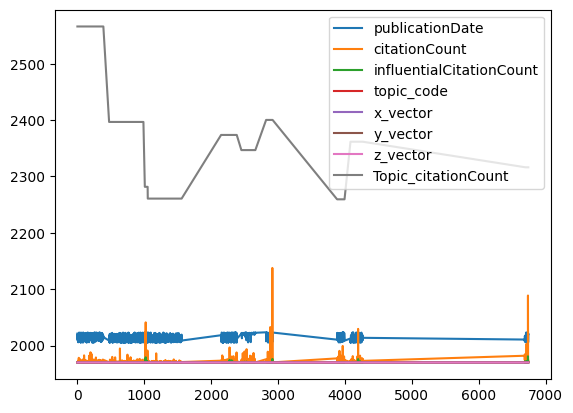

In [170]:
# Plot the data with a legend
df_2005_top_10.plot(kind='line',  legend=True)

<Axes: xlabel='Year,Month'>

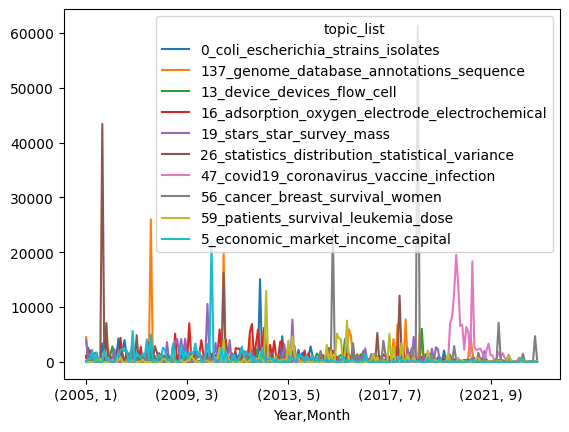

In [176]:
pivot_table.plot(kind='line',  legend=True)

In [180]:
df_2005_top_10.reset_index(inplace=True)
df_2005_top_10['YearMonth'] = df_2005_top_10['Year'].astype(str) + '-' + df_2005_top_10['Month'].astype(str).str.zfill(2)

In [190]:
# Set 'publicationDate' as the index
df_2005_top_10.set_index('publicationDate', inplace=True)

# Group by 'Year', 'Month', and 'topic_list', and sum the 'citationCount'
monthly_citation_counts = df_2005_top_10.groupby(['Year', 'Month', 'topic_list'])['citationCount'].sum().reset_index()

# Pivot the table to have topics as columns and months as rows
pivot_table = monthly_citation_counts.pivot_table(index=['Year', 'Month'], columns='topic_list', values='citationCount', fill_value=0)


In [191]:
pivot_table

topic_list  0_coli_escherichia_strains_isolates  \
Year Month                                        
2005 1                                      725   
     2                                     2576   
     3                                      676   
     4                                     1278   
     5                                     1488   
...                                         ...   
2022 8                                        0   
     9                                        0   
     10                                       0   
     11                                       8   
     12                                       0   

topic_list  137_genome_database_annotations_sequence  \
Year Month                                             
2005 1                                          4506   
     2                                             0   
     3                                             0   
     4                                             0   
     5                                             0   
...                                              ...   
2022 8                                             0   
     9                                             0   
     10                                            0   
     11                                          768   
     12                                            0   

topic_list  13_device_devices_flow_cell  \
Year Month                                
2005 1                              208   
     2                              321   
     3                              518   
     4                              669   
     5                              779   
...                                 ...   
2022 8                                0   
     9                                0   
     10                               0   
     11                               0   
     12                               0   

topic_list  16_adsorption_oxygen_electrode_electrochemical  \
Year Month                                                   
2005 1                                                1075   
     2                                                   0   
     3                                                2106   
     4                                                   0   
     5                                                   0   
...                                                    ...   
2022 8                                                  23   
     9                                                  10   
     10                                                  0   
     11                                                  0   
     12                                                 22   

topic_list  19_stars_star_survey_mass  \
Year Month                              
2005 1                           3947   
     2                            368   
     3                           1457   
     4                              0   
     5                            313   
...                               ...   
2022 8                              0   
     9                             16   
     10                             0   
     11                             0   
     12                             0   

topic_list  26_statistics_distribution_statistical_variance  \
Year Month                                                    
2005 1                                                    0   
     2                                                    0   
     3                                                  901   
     4                                                    0   
     5                                                    0   
...                                                     ...   
2022 8                                                    0   
     9                                                    0   
     10                                                   0   
     11      

With pivot_table, you'll have a DataFrame where each row represents a specific month and year, and each column represents a topic. The values in the DataFrame are the summed citation counts for each topic in each month, making it suitable for time series analysis and visualization.

In [184]:
df_2005_top_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   publicationDate           2356 non-null   datetime64[ns]
 1   title                     2356 non-null   object        
 2   abstract                  2356 non-null   object        
 3   citationCount             2356 non-null   int64         
 4   influentialCitationCount  2356 non-null   int64         
 5   topic_code                2356 non-null   int64         
 6   topic_list                2356 non-null   object        
 7   x_vector                  2356 non-null   float64       
 8   y_vector                  2356 non-null   float64       
 9   z_vector                  2356 non-null   float64       
 10  Topic_citationCount       2356 non-null   int64         
 11  Year                      2356 non-null   int32         
 12  Month               

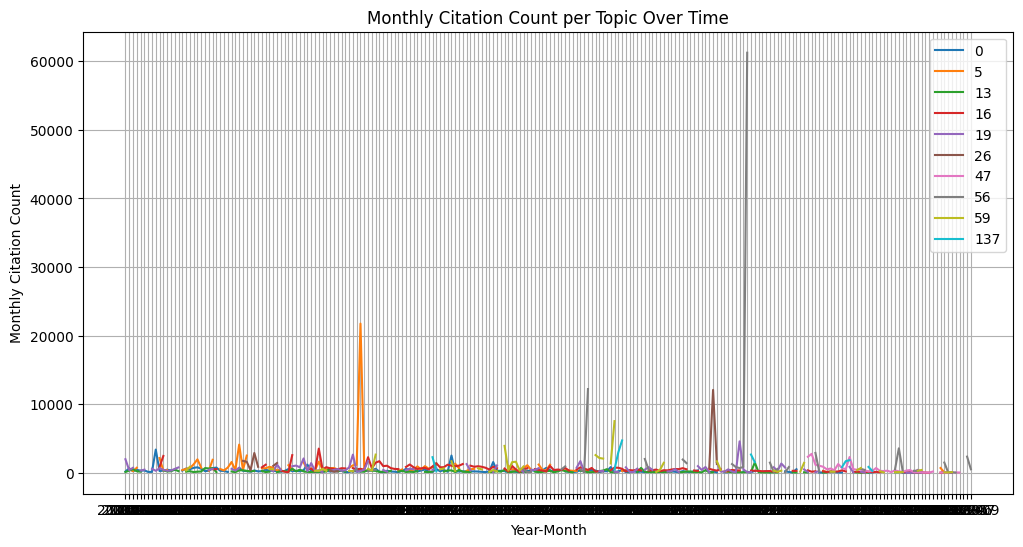

In [186]:
# Assuming you have a pivot_table with topics as columns and 'YearMonth' as the index
pivot_table = df_2005_top_10.pivot_table(index='YearMonth', columns='topic_code', values='citationCount')

# Extract the list of topics (column names) from the pivot_table
topics = pivot_table.columns

# Create a line plot for each topic
plt.figure(figsize=(12, 6))

for topic in topics:
    plt.plot(pivot_table.index, pivot_table[topic], label=topic)

plt.xlabel('Year-Month')
plt.ylabel('Monthly Citation Count')
plt.title('Monthly Citation Count per Topic Over Time')
plt.legend()
plt.grid(True)

plt.show()

In [212]:
df_2005_top_10 = df_2005_top_10.reset_index()

In [215]:
df_2005_top_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   publicationDate           2306 non-null   datetime64[ns]
 1   title                     2306 non-null   object        
 2   abstract                  2306 non-null   object        
 3   citationCount             2306 non-null   int64         
 4   influentialCitationCount  2306 non-null   int64         
 5   topic_code                2306 non-null   int64         
 6   topic_list                2306 non-null   object        
 7   x_vector                  2306 non-null   float64       
 8   y_vector                  2306 non-null   float64       
 9   z_vector                  2306 non-null   float64       
 10  Topic_citationCount       2306 non-null   int64         
 11  Year                      2306 non-null   int32         
 12  Month               

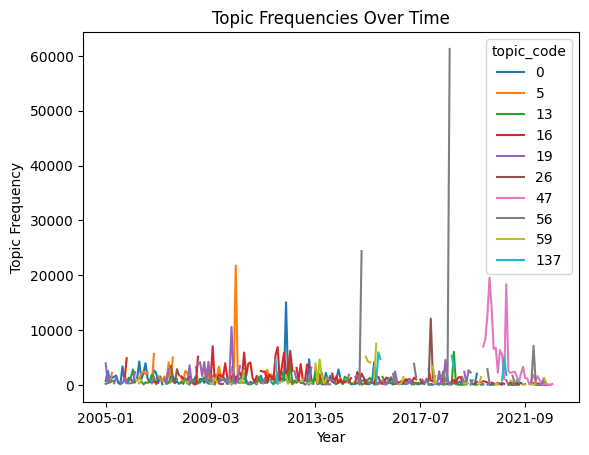

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by "Topic" and "Timestamp" and aggregate "Frequency"
grouped_df = df_2005_top_10.groupby(['topic_code', 'YearMonth'])['citationCount'].sum().reset_index()

# Pivot the DataFrame to get years on the x-axis and Topic Frequencies as columns
pivot_df = grouped_df.pivot(index='YearMonth', columns='topic_code', values='citationCount')

# Plot the data with a legend
pivot_df.plot(kind='line', legend=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Topic Frequency')
plt.title('Topic Frequencies Over Time')

# Show the plot
plt.show()

In [197]:
pivot_df

topic_code,0,5,13,16,19,26,47,56,59,137
YearMonth,,,,,,,,,,
2005-01,725.0,NaN,208.0,1075.0,3947.0,NaN,NaN,NaN,NaN,4506.0
2005-02,2576.0,540.0,321.0,NaN,368.0,NaN,NaN,NaN,NaN,NaN
2005-03,676.0,458.0,518.0,2106.0,1457.0,901.0,NaN,NaN,NaN,NaN
2005-04,1278.0,2195.0,669.0,NaN,NaN,NaN,NaN,1208.0,NaN,NaN
2005-05,1488.0,NaN,779.0,NaN,313.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-08,NaN,NaN,NaN,23.0,NaN,NaN,36.0,NaN,NaN,NaN
2022-09,NaN,NaN,NaN,10.0,16.0,NaN,18.0,NaN,NaN,NaN
2022-10,NaN,NaN,NaN,NaN,NaN,NaN,186.0,NaN,NaN,NaN


In [201]:
pivot_df.fillna(0, inplace=True)

In [218]:
pivot_df = pivot_df.reset_index()

In [219]:
pivot_df 

topic_code,YearMonth,0,5,13,16,19,26,47,56,59,137
0,2005-01,725.0,0.0,208.0,1075.0,3947.0,0.0,0.0,0.0,0.0,4506.0
1,2005-02,2576.0,540.0,321.0,0.0,368.0,0.0,0.0,0.0,0.0,0.0
2,2005-03,676.0,458.0,518.0,2106.0,1457.0,901.0,0.0,0.0,0.0,0.0
3,2005-04,1278.0,2195.0,669.0,0.0,0.0,0.0,0.0,1208.0,0.0,0.0
4,2005-05,1488.0,0.0,779.0,0.0,313.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
211,2022-08,0.0,0.0,0.0,23.0,0.0,0.0,36.0,0.0,0.0,0.0
212,2022-09,0.0,0.0,0.0,10.0,16.0,0.0,18.0,0.0,0.0,0.0
213,2022-10,0.0,0.0,0.0,0.0,0.0,0.0,186.0,0.0,0.0,0.0
214,2022-11,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,768.0


In [220]:
pivot_df['YearMonth'] = pd.to_datetime(pivot_df['YearMonth'], format='%Y-%m')

In [223]:
pivot_df

topic_code,YearMonth,0,5,13,16,19,26,47,56,59,137
0,2005-01-01,725.0,0.0,208.0,1075.0,3947.0,0.0,0.0,0.0,0.0,4506.0
1,2005-02-01,2576.0,540.0,321.0,0.0,368.0,0.0,0.0,0.0,0.0,0.0
2,2005-03-01,676.0,458.0,518.0,2106.0,1457.0,901.0,0.0,0.0,0.0,0.0
3,2005-04-01,1278.0,2195.0,669.0,0.0,0.0,0.0,0.0,1208.0,0.0,0.0
4,2005-05-01,1488.0,0.0,779.0,0.0,313.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
211,2022-08-01,0.0,0.0,0.0,23.0,0.0,0.0,36.0,0.0,0.0,0.0
212,2022-09-01,0.0,0.0,0.0,10.0,16.0,0.0,18.0,0.0,0.0,0.0
213,2022-10-01,0.0,0.0,0.0,0.0,0.0,0.0,186.0,0.0,0.0,0.0
214,2022-11-01,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,768.0


In [221]:
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  216 non-null    datetime64[ns]
 1   0          216 non-null    float64       
 2   5          216 non-null    float64       
 3   13         216 non-null    float64       
 4   16         216 non-null    float64       
 5   19         216 non-null    float64       
 6   26         216 non-null    float64       
 7   47         216 non-null    float64       
 8   56         216 non-null    float64       
 9   59         216 non-null    float64       
 10  137        216 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 18.7 KB


In [222]:
# Separating the training set and testing set
train_data=pivot_df[pivot_df['YearMonth'].dt.year<2018].reset_index(drop = True)
test_data=pivot_df[pivot_df['YearMonth'].dt.year>2017].reset_index(drop = True)

In [234]:
# Define the target column (Topic you want to forecast)
target_topic = 19  # Change this to the Topic you want to forecast

# Prepare the training and testing data
X_train = train_data.drop(target_topic, axis=1)
y_train = train_data[target_topic]  # Shift by 1 to align with next year's frequency
X_test = test_data.drop(target_topic, axis=1)
y_test = test_data[target_topic]

In [225]:
from xgboost import XGBRegressor

In [227]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from xgboost import plot_importance

Root Mean Squared Error (RMSE): 1097.6086096216657


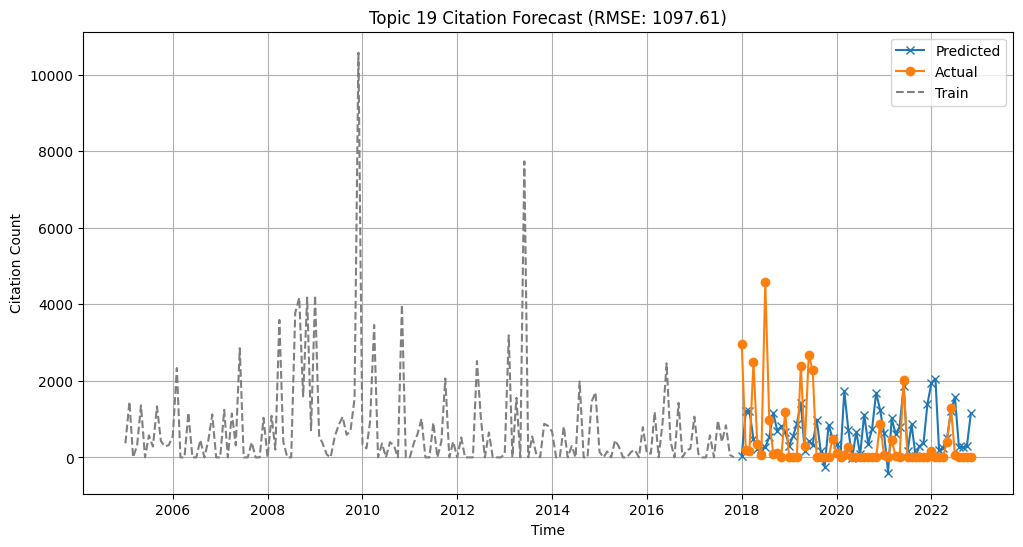

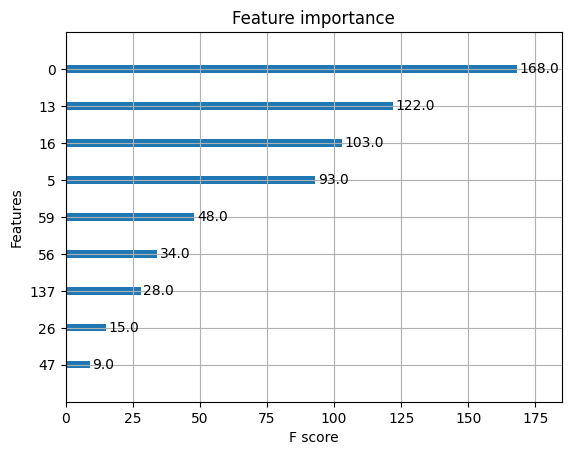

In [235]:
# Shift the target column to align with next year's frequency
y_train = train_data[target_topic].shift(-1).dropna()
y_test = test_data[target_topic].shift(-1).dropna()

# Exclude the 'YearMonth' column from the training and testing data
X_train = train_data.drop(columns=['YearMonth', target_topic]).iloc[:-1]
X_test = test_data.drop(columns=['YearMonth', target_topic]).iloc[:-1]

# Create an XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Create a DataFrame with YearMonth and the predicted values
y_pred_df = pd.DataFrame({'YearMonth': test_data['YearMonth'].iloc[:-1], 'Predicted': y_pred})

# Merge the predicted DataFrame with the original test_data DataFrame
merged_data = pd.merge(y_pred_df, test_data, on='YearMonth')

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the predicted vs. actual values along with y_train
plt.figure(figsize=(12, 6))
plt.plot(merged_data['YearMonth'], merged_data['Predicted'], label='Predicted', marker='x')
plt.plot(merged_data['YearMonth'], merged_data[target_topic], label='Actual', marker='o')
plt.plot(train_data['YearMonth'].iloc[:-1], y_train, label='Train', linestyle='--', color='gray')
plt.xlabel('Time')
plt.ylabel('Citation Count')
plt.title(f'Topic {target_topic} Citation Forecast (RMSE: {rmse:.2f})')
plt.legend()
plt.grid(True)

# Feature importance plot (optional)
plot_importance(model)
plt.show()

In [236]:
merged_data

,YearMonth,Predicted,0,5,13,16,19,26,47,56,59,137
0,2018-01-01,39.587990,57.0,0.0,0.0,616.0,2952.0,1273.0,0.0,0.0,3366.0,0.0
1,2018-02-01,1203.656372,0.0,0.0,1106.0,1603.0,181.0,0.0,0.0,0.0,392.0,0.0
2,2018-03-01,1213.727051,133.0,207.0,0.0,0.0,174.0,0.0,0.0,0.0,0.0,7771.0
3,2018-04-01,477.100372,75.0,298.0,181.0,1180.0,2491.0,0.0,0.0,0.0,1318.0,0.0
4,2018-05-01,211.330978,300.0,0.0,222.0,1636.0,345.0,0.0,0.0,1265.0,0.0,0.0
5,2018-06-01,225.134979,306.0,216.0,63.0,351.0,69.0,0.0,0.0,2497.0,0.0,0.0
6,2018-07-01,259.643219,0.0,202.0,156.0,1030.0,4580.0,0.0,0.0,682.0,876.0,0.0
7,2018-08-01,537.010803,364.0,0.0,131.0,0.0,981.0,446.0,0.0,848.0,0.0,0.0
8,2018-09-01,1165.558838,260.0,249.0,129.0,0.0,76.0,0.0,0.0,61258.0,237.0,0.0
9,2018-10-01,696.624329,384.0,0.0,138.0,626.0,110.0,0.0,0.0,0.0,0.0,5320.0
